# GameSense: Understanding Player Sentiment Through NLP

# 1. Summary

#### Aim:
To explore and analyze game reviews by extracting sentiment scores and identifying key terms using sentiment analysis and Bag of Words techniques, ultimately developing a model that accurately predicts sentiment and highlights the most influential words in each review.

#### Pitch:
Understanding the sentiment behind user reviews can guide potential players in deciding which games are worth their time and money. Additionally, by identifying sentiment-rich keywords, game developers and publishers can gain actionable insights into player feedback. This project leverages a large-scale dataset of game reviews to build a sentiment classification model and extract trend-based insights that support both consumer decisions and development strategies.

#### Data:
- A data set with 1512 samples and 13 features are in this dataset. The variable of interest is reviews.
    - Title
    - Release Date
    - Team
    - Rating
    - Times Listed
    - Number of Reviews
    - Genres
    - Summary
    - Reviews
    - Plays
    - Playing
    - Backlogs
    - Wishlist

##### Used Columns
- Title
- Rating
- Number of Reviews
- Summary
- Reviews

#### Feature Engineering
- Count Vectors
- WordLevel TF-IDF	
- N-Gram Vectors	
- CharLevel Vectors

##### Missing Values
- 1 Missing Team
- 13 Missing Ratings
- 1 Missing Summary

#### Method:
- Model 1: Logistic Regression
    - Simple and interpretable model
    - Great basline model
    - Flexible 
- Model 2: Naive Bayes
    - Simple and easy to implement
    - Scalability
    - Handles categorical data well
- Model 3: Support Vector Machine
    - Effective in high dimensional spaces
    - Can model complex decision boundaries using kernals
    - Best when you want strong performance and classes are well seperated
    - Robust to noise and outliers

#### Results and findings:
- Using Vader (before seperation):
    - 84.4% Reviews are positive
    - 14.4% Reviews are negative
    - 1.3% Reviews are neutral

- Using Vader (after seperation):
    - 66.4% Reviews are positive
    - 21.9% Reviews are negative
    - 11.7% Reviews are neutral

##### Baseline Model:
- Logistic Regression:
    - Logistic regression performs fairly well across all vectorisers with the highest accuracy at count vectors with 74%
    - Wordlevel TF-IDF and Charlevel vectors have comparable performance around 70% while N-gram vectors is the lowest performing at 58.6%
- Naive Bayes:
    - Naive Bayes generally performs lower compared to logistic regression and SVM, with the highest being 60.6% with count vectors.
    - Wordlevel TF-IDF, N-gram vectors and CharLevel vectors all perform similarly
- Support Vector Machine
    - SVM performs fairly well with its best accuracy with WordLevel TF-IDf at 74%, while just lower than that performance is CharLevel and count Vectors at 73%
    - The worst performing vectoriser is N-gram vectors at 64% while Count Vectors at 72% is still plausible.
- Overall:
    - SVM seems to be the best performing model out of the 3 with Logistic Regression being just behind it. 
    - Although SVM is better performing, it is also important to note Logistic Regression gives the simplist and interpretable model.
    - The Naive bayes model needs to be adjusted with other feature engineering methods or the hyperparameter tuning.
    - N-gram vectorizer underperformed across all models, suggesting a need to test other n-gram ranges (e.g., (1,2) instead of (2,4)) or consider using fewer rare n-grams.

##### Tuned Model:
- Logistic Regression:
    - Logistic regression performs fairly well across all vectorisers with the highest accuracy at WordLevel TF-IDF with 75%
    - Count vectors, wordlevel TF-IDF and Charlevel vectors all have comparable performance around 74% while N-gram vectors is the lowest performing at 65.5
- Naive Bayes:
    - Naive Bayes generally performs lower compared to logistic regression and SVM, with the highest being 70.3% with CharLevel vectors.
    - Wordlevel TF-IDF, N-gram vectors and CharLevel vectors all perform similarly
- Support Vector Machine
    - SVM performs fairly well with its best accuracy with WordLevel TF-IDf at 75%, while just lower than that performance is CharLevel Vectors at 74%
    - The worst performing vectoriser is N-gram vectors at 66% while Count Vectors at 72% is still plausible.
- Overall:
    - SVM seems to be the best performing model out of the 3 with Logistic Regression being just behind it. 
    - Although SVM is better performing, it is also important to note Logistic Regression gives the simplist and interpretable model.
    - The Naive bayes model needs to be adjusted with other feature engineering methods or the hyperparameter tuning.
    - N-gram vectors has performed poorly across the board so potentially needs to be tested with new n-gram ranges

##### Comparison:
- Logistic Regression:
    - Count Vectors preformed about the same before and after tuning
    - All other vectorisers performed better after tuning
    - Best performing vectoriser is WordLevel TF-IDF after tuning
- Naive Bayes
    - Has performed better over every vectoriser after tuning
    - Improved the most after tuning in comparsion to Logistic Regression and Support Vector Machine
    - Best performing vectoriser is CharLevel Vectors after tuning
- Support Vector Machine
    - Minimal difference from before and after tuning
    - All vectorisers perform around the same except for N-gram vectors.
    - Best performing vectoriser WordLevel TF-IDF
- Overall:
    - Hyperparameter Tuning has improved the results in every model.
        - Most improvements are with Naive Bayes model.
    - N-Gram vectors is still an underperforming vectoriser.
    - The best performing model is Logitistic Regression with WordLevel TF-IDF at 74.98%, while just behind it is the same vectoriser with Support vector machine at 74.96%.

#### Conclusion
- The best-performing model was Logistic Regression with Word-Level TF-IDF vectorizer, with SVM using the same vectorizer close behind—making it a strong alternative.
- After fitting the best model, I was able to identify key words that influenced the sentiment of individual reviews, providing valuable insights for both developers and users.
- Hyperparameter tuning significantly improved performance, suggesting that further optimization could yield even better results.
- With a final F1-score of 74.98%, the model meets the project’s goal for acceptable performance in sentiment classification.

#### Challenges
- Cleaning the dataset, very messy
- Dataset was small so need more data (more titles to work with)
- Reviews come in different languages so to deploy to a different region could result in more issues

#### Future Improvements or considerations
- Deploy a model which can take a review and produce the results
- Improve f1-score with more hyperparameter tuning
- More data
- Using deep learning or transformer-based models.


#### 1.1 Data Dictionary

| **Features**            | **Description**      |
|--------------------------|----------------------------------------------------------------------|
| **Title:**               | Title of the game
| **Release Date:**        | Date of release of the game's first version
| **Team:**                | Game developer team
| **Rating:**              | Average Rating
| **Times Listed:**        | Number of users who listed this game
| **Number of Reviews:**   | Number of reviews received from the users
| **Genres:**              | All genres pertaining to a specified game
| **Summary:**             | Summary provided by the team
| **Reviews:**             | User Reviews
| **Plays:**               | Number of users that have played the game before
| **Playing:**             | Number of current users who are playing the game
| **Backlogs**             | Number of users who have access but havent sarted with the game yet
| **Wishlist:**            | Number of users who wish to play the game

#### 1.2 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import ast
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prashil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prashil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Prashil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_csv("games.csv", index_col = 0)

#### 2. EDA

In [3]:
df.head()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


In [4]:
df.tail()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602
1511,The LEGO Movie Videogame,"Feb 04, 2014","['WB Games', 'TT Fusion']",2.8,184,184,"['Adventure', 'Puzzle']",Join Emmet and an unlikely group of resistance...,"['Legal', 'Pretty Average Lego Game But It Was...",1.7K,11,239,73


In [5]:
df.shape

(1512, 13)

In [6]:
df.describe()

,Rating
count,1499.000000
mean,3.719346
std,0.532608
min,0.700000
25%,3.400000
50%,3.800000
75%,4.100000
max,4.800000


In [7]:
df.isnull().sum()

Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

In [8]:
df.corr(numeric_only=True)

,Rating
Rating,1.0


- Data looks very unclean, data types needs to change.
- Missing data needs to be removed.
- Need to seperate the genres so it can be viewed individually
- Need to seperate the reviews so it can be reviews individually so the model will be accurate.

##### 2.1 Drop missing rows

In [9]:
df.isnull().sum()

Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

Title                0
Release Date         0
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
dtype: int64

In [12]:
df.shape

(1498, 13)

##### 2.2 Duplicate Check

In [13]:
df['Duplicate_Status'] = np.where(df["Title"].duplicated(keep='first'), 'Duplicate', 'Unique') #Creates a new duplicate status column which runs through the dataset, keeps the first instance of every title as unique and the next as duplicates

In [14]:
df["Duplicate_Status"].value_counts() #Unique vs Duplicate check

Duplicate_Status
Unique       1085
Duplicate     413
Name: count, dtype: int64

In [15]:
df[df["Duplicate_Status"] == "Duplicate"] #Prints Duplicate rows

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Duplicate_Status
132,Doom,"Dec 10, 1993","['Activision', 'id Software']",4.0,1.4K,1.4K,['Shooter'],"In the future, humans have left Earth and sett...","['Recomendadisimo', 'classic', 'doom my belove...",11K,203,1.5K,514,Duplicate
159,Dead Space,"Oct 14, 2008","['EA Redwood Shores', 'Electronic Arts']",4.0,1.2K,1.2K,['Shooter'],Dead Space is a 2008 science fiction survival ...,['Impressionante demais pra Ã©poca e realmente...,9.6K,302,2.7K,1.1K,Duplicate
161,Shadow of the Colossus,"Feb 06, 2018","['Sony Interactive Entertainment', 'Bluepoint ...",4.1,1.1K,1.1K,"['Adventure', 'Platform', 'Puzzle']",Tales speak of an ancient land where creatures...,['(Played before 2023)\n \...,7.8K,242,3.2K,1.6K,Duplicate
163,God of War,"Mar 22, 2005","['SCE Santa Monica Studio', 'Sony Computer Ent...",3.6,981,981,"['Adventure', 'Brawler', 'Strategy']","Similar to franchises like Devil May Cry, Ryga...","['As a god of war game, It s incredible\n ...",11K,158,1.5K,896,Duplicate
326,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K,Duplicate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Fatal Frame II: Crimson Butterfly,"Nov 27, 2003","['Tecmo Co., Ltd.', 'Ubisoft Entertainment']",4.2,398,398,['Adventure'],Crimson Butterfly is the second installment in...,['Pretty cool albeit a bit similar to the firs...,1K,38,690,513,Duplicate
1282,Super Mario Sunshine,"Sep 18, 2020","['Nintendo EAD', 'Nintendo']",3.7,19,19,"['Adventure', 'Platform']",A port of Super Mario Sunshine included in Sup...,['What an amazing remaster of an already amazi...,340,6,83,14,Duplicate
1332,Doom,"Nov 10, 2017","['Bethesda Softworks', 'id Software']",3.9,80,80,['Shooter'],"Doom, the brutally fun and challenging modern-...",['can we get a Doom anime. Now I would watch t...,2.3K,37,393,150,Duplicate
1492,Sonic the Hedgehog 2,"Oct 16, 1992","['Aspect Co. Ltd', 'Sega']",2.8,157,157,"['Adventure', 'Arcade', 'Platform']",This is a completely different game than its 1...,['Played as part of Sonic Gems Collection on t...,1.4K,6,173,45,Duplicate


In [16]:
# Drop rows where 'Duplicate_Status' is 'Duplicate'
df = df.drop(df[df['Duplicate_Status'] == 'Duplicate'].index)
# Reset index to maintain order
df.reset_index(drop=True, inplace=True)

In [17]:
df["Duplicate_Status"].value_counts()  

Duplicate_Status
Unique    1085
Name: count, dtype: int64

In [18]:
df = df.drop(columns=['Duplicate_Status'])

In [19]:
df.tail()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1080,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1081,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1082,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1083,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602
1084,The LEGO Movie Videogame,"Feb 04, 2014","['WB Games', 'TT Fusion']",2.8,184,184,"['Adventure', 'Puzzle']",Join Emmet and an unlikely group of resistance...,"['Legal', 'Pretty Average Lego Game But It Was...",1.7K,11,239,73


##### 2.3 Data Type Conversion

In [20]:
df.dtypes

Title                 object
Release Date          object
Team                  object
Rating               float64
Times Listed          object
Number of Reviews     object
Genres                object
Summary               object
Reviews               object
Plays                 object
Playing               object
Backlogs              object
Wishlist              object
dtype: object

In [21]:
df

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1081,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1082,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1083,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


In [22]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors = 'coerce')
df['Release Year'] = df['Release Date'].dt.year.fillna(0).astype('int64')
df['Release Date'] = df['Release Date'].dt.strftime('%d-%m-%Y')

In [23]:
def convert_k_values(value):
    value = str(value).strip().lower()
    if 'k' in value:
        return int(float(value.replace('k', '')) * 1000)
    try:
        return int(float(value))
    except:
        return None  # or np.nan if you're using NumPy
df['Times Listed'] = df['Times Listed'].apply(convert_k_values)
df['Number of Reviews'] = df['Number of Reviews'].apply(convert_k_values)
df['Plays'] = df['Plays'].apply(convert_k_values)
df['Playing'] = df['Playing'].apply(convert_k_values)
df['Backlogs'] = df['Backlogs'].apply(convert_k_values)
df['Wishlist'] = df['Wishlist'].apply(convert_k_values)

In [24]:
df.dtypes

Title                 object
Release Date          object
Team                  object
Rating               float64
Times Listed           int64
Number of Reviews      int64
Genres                object
Summary               object
Reviews               object
Plays                  int64
Playing                int64
Backlogs               int64
Wishlist               int64
Release Year           int64
dtype: object

In [25]:
df

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Release Year
0,Elden Ring,25-02-2022,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17000,3800,4600,4800,2022
1,Hades,10-12-2019,['Supergiant Games'],4.3,2900,2900,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21000,3200,6300,3600,2019
2,The Legend of Zelda: Breath of the Wild,03-03-2017,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300,4300,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000,2500,5000,2600,2017
3,Undertale,15-09-2015,"['tobyfox', '8-4']",4.2,3500,3500,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000,679,4900,1800,2015
4,Hollow Knight,24-02-2017,['Team Cherry'],4.4,3000,3000,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21000,2400,8300,2300,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Back to the Future: The Game,22-12-2010,['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67,2010
1081,Team Sonic Racing,21-05-2019,"['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1500,49,413,107,2019
1082,Dragon's Dogma,22-05-2012,['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1100,45,487,206,2012
1083,Baldur's Gate 3,06-10-2020,['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602,2020


In [26]:
# Convert the 'Genres' column from string to actual lists
df['Genres'] = df['Genres'].apply(ast.literal_eval) #Can not be rerun

# Flatten the list and count occurrences
genre_counts = pd.Series([genre for sublist in df['Genres'] for genre in sublist]).value_counts()
# Print the top genres
print(genre_counts)
type(genre_counts)

Adventure              706
RPG                    355
Shooter                254
Platform               236
Indie                  206
Puzzle                 128
Strategy               114
Brawler                103
Simulator               92
Turn Based Strategy     70
Fighting                63
Arcade                  59
Visual Novel            51
Tactical                42
Racing                  37
Point-and-Click         36
Music                   21
Sport                   20
Card & Board Game       13
Real Time Strategy       9
Quiz/Trivia              3
MOBA                     2
Pinball                  1
Name: count, dtype: int64


pandas.core.series.Series

##### 2.4 Data Correlation

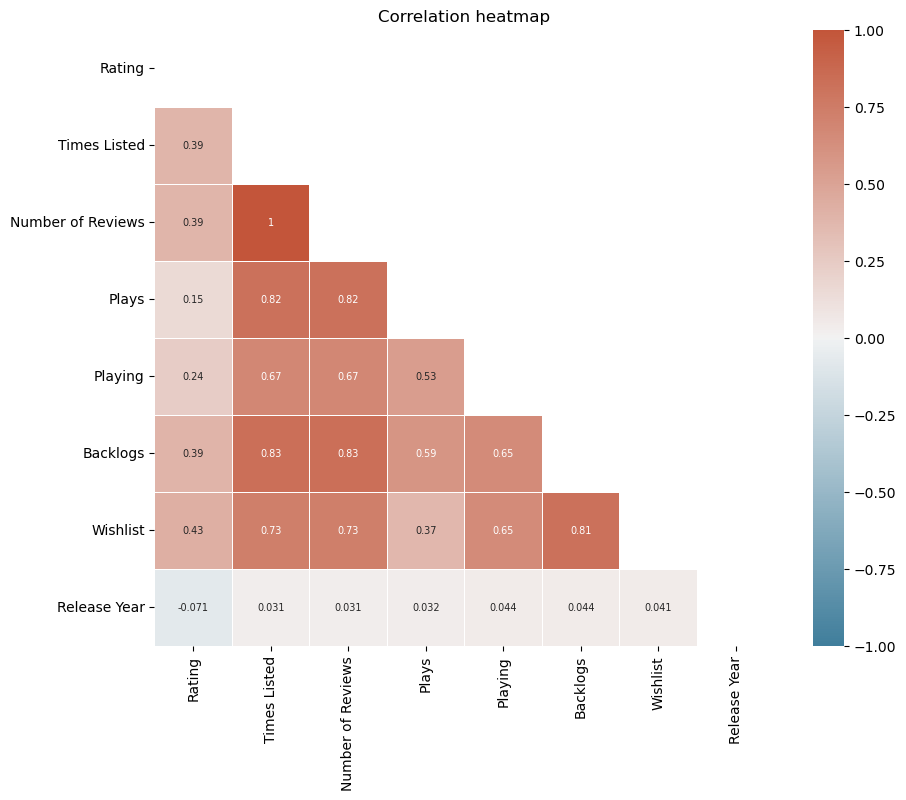

In [27]:
corr = df.corr(numeric_only=True)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr,
           annot=True,
           linewidth=.5,
           center=0,
           mask=mask,
           cmap=cmap,
           vmin=-1, 
           vmax=1,
           annot_kws={"size":7})
#plt.yticks(rotation=45)
plt.title('Correlation heatmap')
plt.show()

- Times listed and number of reviews is a correlation of 1 has they contain the same values, times listed will be removed due to the correlation and also not of importance.
- Strong correlation between backlogs and wishlist showing alot of users aim to play or buy the game but play the game
- Strong correlation between plays and times listed/number of reviews which explains high number of users who played the game post reviews.
- Moderate correlation between rating and number of reviews shows as the rating increases so does the number of reviews
- Weak to mild correlation between rating and plays which explains rating alone isn’t a strong predictor of how many people will play a game.
- Weak to mild correlation between rating and plays which explains rating alone isn’t a strong predictor of how many people are playing a game.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1085 non-null   object 
 1   Release Date       1083 non-null   object 
 2   Team               1085 non-null   object 
 3   Rating             1085 non-null   float64
 4   Times Listed       1085 non-null   int64  
 5   Number of Reviews  1085 non-null   int64  
 6   Genres             1085 non-null   object 
 7   Summary            1085 non-null   object 
 8   Reviews            1085 non-null   object 
 9   Plays              1085 non-null   int64  
 10  Playing            1085 non-null   int64  
 11  Backlogs           1085 non-null   int64  
 12  Wishlist           1085 non-null   int64  
 13  Release Year       1085 non-null   int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 118.8+ KB


In [29]:
df.isnull().sum()

Title                0
Release Date         2
Team                 0
Rating               0
Times Listed         0
Number of Reviews    0
Genres               0
Summary              0
Reviews              0
Plays                0
Playing              0
Backlogs             0
Wishlist             0
Release Year         0
dtype: int64

#### 3. Explode set

In [30]:
import ast

# Step 1: Convert stringified list to actual list using `ast.literal_eval`
df['Reviews'] = df['Reviews'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Step 2: Explode the reviews into separate rows
df_exploded_reviews = df.explode('Reviews').reset_index(drop=True)

In [31]:
df_exploded_reviews

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Release Year
0,Elden Ring,25-02-2022,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000,3800,4600,4800,2022
1,Elden Ring,25-02-2022,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",a replay solidified my love for elden ring. so...,17000,3800,4600,4800,2022
2,Elden Ring,25-02-2022,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...","The game is absolutely beautiful, with so much...",17000,3800,4600,4800,2022
3,Elden Ring,25-02-2022,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",Took everything great about the Soulsborne gam...,17000,3800,4600,4800,2022
4,Elden Ring,25-02-2022,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",I play with my overlevelled friend every time ...,17000,3800,4600,4800,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,The LEGO Movie Videogame,04-02-2014,"['WB Games', 'TT Fusion']",2.8,184,184,"[Adventure, Puzzle]",Join Emmet and an unlikely group of resistance...,Pretty Average Lego Game But It Was My Childhood,1700,11,239,73,2014
6490,The LEGO Movie Videogame,04-02-2014,"['WB Games', 'TT Fusion']",2.8,184,184,"[Adventure, Puzzle]",Join Emmet and an unlikely group of resistance...,pog lego game,1700,11,239,73,2014
6491,The LEGO Movie Videogame,04-02-2014,"['WB Games', 'TT Fusion']",2.8,184,184,"[Adventure, Puzzle]",Join Emmet and an unlikely group of resistance...,Pretty decent lego game! Loved the attention t...,1700,11,239,73,2014
6492,The LEGO Movie Videogame,04-02-2014,"['WB Games', 'TT Fusion']",2.8,184,184,"[Adventure, Puzzle]",Join Emmet and an unlikely group of resistance...,Class,1700,11,239,73,2014


##### 3.1 Remove non-english reviews

In [32]:
#!pip install langdetect

In [33]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0  # Makes results more consistent

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False  # If detection fails, treat it as non-English

# Apply filter
df_exploded_reviews = df_exploded_reviews[df_exploded_reviews['Reviews'].astype(str).apply(is_english)].reset_index(drop=True)


In [34]:
df_exploded_reviews

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Release Year
0,Elden Ring,25-02-2022,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000,3800,4600,4800,2022
1,Elden Ring,25-02-2022,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",a replay solidified my love for elden ring. so...,17000,3800,4600,4800,2022
2,Elden Ring,25-02-2022,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...","The game is absolutely beautiful, with so much...",17000,3800,4600,4800,2022
3,Elden Ring,25-02-2022,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",Took everything great about the Soulsborne gam...,17000,3800,4600,4800,2022
4,Elden Ring,25-02-2022,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",I play with my overlevelled friend every time ...,17000,3800,4600,4800,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4886,Baldur's Gate 3,06-10-2020,['Larian Studios'],4.1,165,165,"[Adventure, RPG, Strategy, Tactical, Turn Base...","An ancient evil has returned to Baldur's Gate,...","Game can be fun but the story, character inter...",269,79,388,602,2020
4887,The LEGO Movie Videogame,04-02-2014,"['WB Games', 'TT Fusion']",2.8,184,184,"[Adventure, Puzzle]",Join Emmet and an unlikely group of resistance...,Pretty Average Lego Game But It Was My Childhood,1700,11,239,73,2014
4888,The LEGO Movie Videogame,04-02-2014,"['WB Games', 'TT Fusion']",2.8,184,184,"[Adventure, Puzzle]",Join Emmet and an unlikely group of resistance...,Pretty decent lego game! Loved the attention t...,1700,11,239,73,2014
4889,The LEGO Movie Videogame,04-02-2014,"['WB Games', 'TT Fusion']",2.8,184,184,"[Adventure, Puzzle]",Join Emmet and an unlikely group of resistance...,Class,1700,11,239,73,2014


##### 3.2 Clean Text

In [35]:
# 🧹 3. Text Cleaning Function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # remove emojis/non-ASCII
    #text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace, tabs, newlines
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)
df_exploded_reviews['cleaned_reviews'] = df_exploded_reviews['Reviews'].astype(str).apply(clean_text)

In [36]:
df_exploded_reviews

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Release Year,cleaned_reviews
0,Elden Ring,25-02-2022,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000,3800,4600,4800,2022,first playthrough elden ring one best eperienc...
1,Elden Ring,25-02-2022,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",a replay solidified my love for elden ring. so...,17000,3800,4600,4800,2022,replay solidified love elden ring easily favor...
2,Elden Ring,25-02-2022,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...","The game is absolutely beautiful, with so much...",17000,3800,4600,4800,2022,game absolutely beautiful much replayability c...
3,Elden Ring,25-02-2022,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",Took everything great about the Soulsborne gam...,17000,3800,4600,4800,2022,took everything great soulsborne game make 100...
4,Elden Ring,25-02-2022,"['Bandai Namco Entertainment', 'FromSoftware']",4.5,3900,3900,"[Adventure, RPG]","Elden Ring is a fantasy, action and open world...",I play with my overlevelled friend every time ...,17000,3800,4600,4800,2022,play overlevelled friend every time still fail...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4886,Baldur's Gate 3,06-10-2020,['Larian Studios'],4.1,165,165,"[Adventure, RPG, Strategy, Tactical, Turn Base...","An ancient evil has returned to Baldur's Gate,...","Game can be fun but the story, character inter...",269,79,388,602,2020,game fun story character interaction character...
4887,The LEGO Movie Videogame,04-02-2014,"['WB Games', 'TT Fusion']",2.8,184,184,"[Adventure, Puzzle]",Join Emmet and an unlikely group of resistance...,Pretty Average Lego Game But It Was My Childhood,1700,11,239,73,2014,pretty average lego game childhood
4888,The LEGO Movie Videogame,04-02-2014,"['WB Games', 'TT Fusion']",2.8,184,184,"[Adventure, Puzzle]",Join Emmet and an unlikely group of resistance...,Pretty decent lego game! Loved the attention t...,1700,11,239,73,2014,pretty decent lego game loved attention detail...
4889,The LEGO Movie Videogame,04-02-2014,"['WB Games', 'TT Fusion']",2.8,184,184,"[Adventure, Puzzle]",Join Emmet and an unlikely group of resistance...,Class,1700,11,239,73,2014,class


##### 3.3 Vader Sentiment Analyser

In [37]:
df_reviews = df_exploded_reviews[['Title', 'Genres', 'Rating', 'Number of Reviews', 'Summary', 'Reviews']]

In [38]:
df_reviews

,Title,Genres,Rating,Number of Reviews,Summary,Reviews
0,Elden Ring,"[Adventure, RPG]",4.5,3900,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...
1,Elden Ring,"[Adventure, RPG]",4.5,3900,"Elden Ring is a fantasy, action and open world...",a replay solidified my love for elden ring. so...
2,Elden Ring,"[Adventure, RPG]",4.5,3900,"Elden Ring is a fantasy, action and open world...","The game is absolutely beautiful, with so much..."
3,Elden Ring,"[Adventure, RPG]",4.5,3900,"Elden Ring is a fantasy, action and open world...",Took everything great about the Soulsborne gam...
4,Elden Ring,"[Adventure, RPG]",4.5,3900,"Elden Ring is a fantasy, action and open world...",I play with my overlevelled friend every time ...
...,...,...,...,...,...,...
4886,Baldur's Gate 3,"[Adventure, RPG, Strategy, Tactical, Turn Base...",4.1,165,"An ancient evil has returned to Baldur's Gate,...","Game can be fun but the story, character inter..."
4887,The LEGO Movie Videogame,"[Adventure, Puzzle]",2.8,184,Join Emmet and an unlikely group of resistance...,Pretty Average Lego Game But It Was My Childhood
4888,The LEGO Movie Videogame,"[Adventure, Puzzle]",2.8,184,Join Emmet and an unlikely group of resistance...,Pretty decent lego game! Loved the attention t...
4889,The LEGO Movie Videogame,"[Adventure, Puzzle]",2.8,184,Join Emmet and an unlikely group of resistance...,Class


In [39]:
# Ensure df_reviews is a copy
df_reviews = df_reviews.copy()

# Apply VADER and label sentiment safely
sia = SentimentIntensityAnalyzer()

def get_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_reviews['compound_score'] = df_reviews['Reviews'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
df_reviews['sentiment'] = df_reviews['compound_score'].apply(get_sentiment)

df_reviews['sentiment'].value_counts()

sentiment
positive    3247
negative    1071
neutral      573
Name: count, dtype: int64

#### 4. Graphs

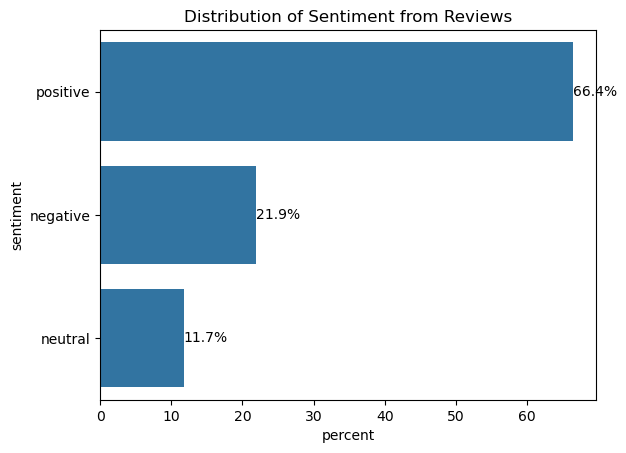

In [40]:
plot = sns.countplot(y = 'sentiment',
            data = df_reviews, 
            orient = 'h',
            stat = 'percent')
plot.set_title('Distribution of Sentiment from Reviews')
plot.bar_label(plot.containers[0], fmt='%.1f%%')  # show percentages with 1 decimal
plt.show()

- 66.4% Reviews are positive
- 21.9% Reviews are negative
- 11.7% Reviews are neutral
- Sentiments are quite uneven with a high proportion of positive reviews. 
    - When splitting will need to keep this in mind.
- As sentiments are unbalanced, I focus on f1-score over accuracy as it balances precision and recall which ensures both negative and neutral reviews are also classifeid correctly.

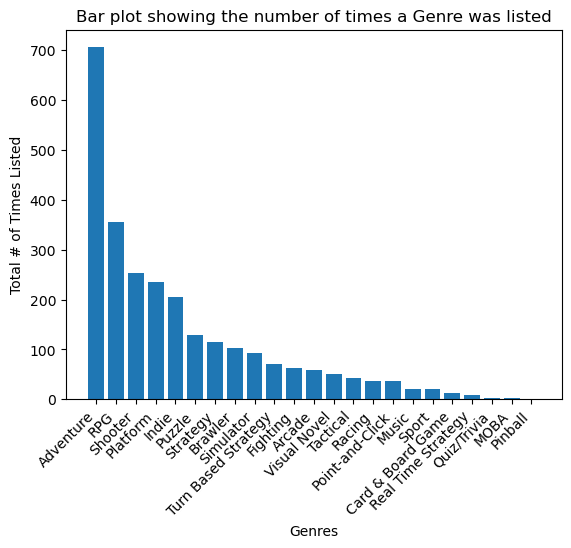

In [41]:
_ = plt.bar(genre_counts.index, genre_counts.values, align='center')

# Add labels and title
plt.xlabel('Genres')
plt.xticks(rotation=45, ha='right') #xlabels rotated for visibility
plt.ylabel('Total # of Times Listed')
plt.title('Bar plot showing the number of times a Genre was listed')

plt.show()

- Adventure, RPG and Shooter are most popular genres of gaming
- Very few genres of quiz/trivia, MOBA, Pinball making it hard to give a sentiment conclusion about these genres

In [42]:
from collections import defaultdict

genre_sentiment_map = defaultdict(lambda: {'positive': 0, 'neutral': 0, 'negative': 0})

for _, row in df_reviews.iterrows():
    for genre in row['Genres']:
        genre_sentiment_map[genre][row['sentiment']] += 1

In [43]:
genre_sentiment_df = pd.DataFrame(genre_sentiment_map).T
genre_sentiment_df = genre_sentiment_df[['positive', 'neutral', 'negative']]  # reorder columns

In [44]:
genre_sentiment_percent = genre_sentiment_df.div(genre_sentiment_df.sum(axis=1), axis=0)

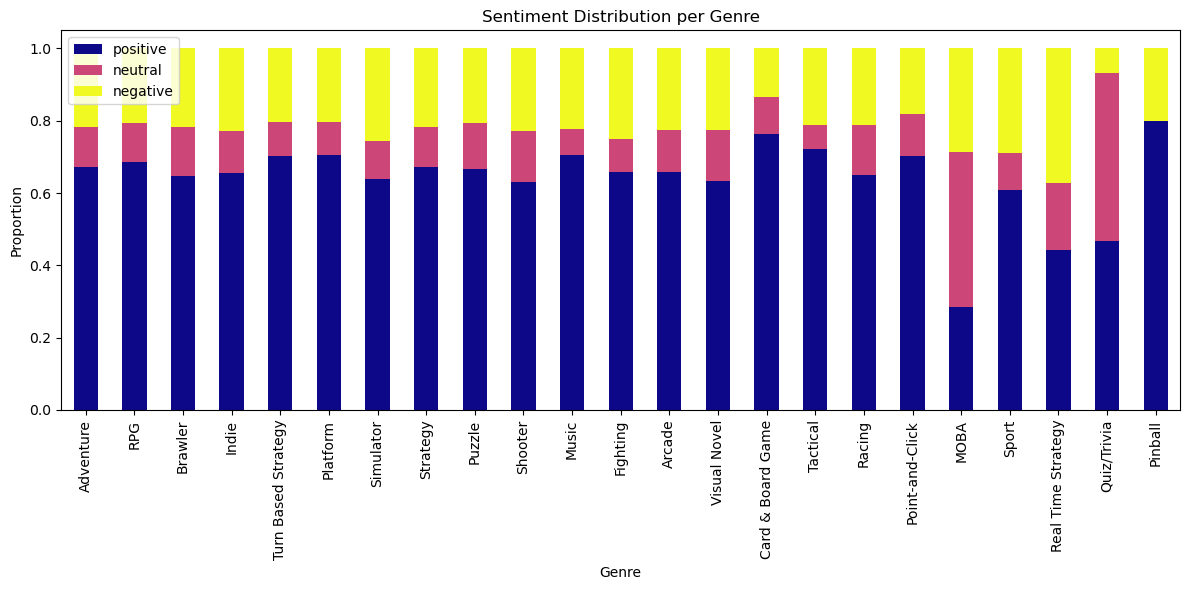

In [45]:
genre_sentiment_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='plasma')
plt.title('Sentiment Distribution per Genre')
plt.ylabel('Proportion')
plt.xlabel('Genre')
plt.tight_layout()
plt.show()

- Roughly 60% of reviews across the genres are positive with a few exceptions such as MOBA, real time strategy and quiz/trivia
- Roughly 20% of reviews are neutral
- Most positive is card/board game and pinball
    - Keeping in mind there isnt alot of games with these genres its not enough information to make conclusions


#### 5. Split the data

In [46]:
df_reviews

,Title,Genres,Rating,Number of Reviews,Summary,Reviews,compound_score,sentiment
0,Elden Ring,"[Adventure, RPG]",4.5,3900,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,0.7302,positive
1,Elden Ring,"[Adventure, RPG]",4.5,3900,"Elden Ring is a fantasy, action and open world...",a replay solidified my love for elden ring. so...,0.9693,positive
2,Elden Ring,"[Adventure, RPG]",4.5,3900,"Elden Ring is a fantasy, action and open world...","The game is absolutely beautiful, with so much...",0.4201,positive
3,Elden Ring,"[Adventure, RPG]",4.5,3900,"Elden Ring is a fantasy, action and open world...",Took everything great about the Soulsborne gam...,0.7906,positive
4,Elden Ring,"[Adventure, RPG]",4.5,3900,"Elden Ring is a fantasy, action and open world...",I play with my overlevelled friend every time ...,0.9558,positive
...,...,...,...,...,...,...,...,...
4886,Baldur's Gate 3,"[Adventure, RPG, Strategy, Tactical, Turn Base...",4.1,165,"An ancient evil has returned to Baldur's Gate,...","Game can be fun but the story, character inter...",0.3566,positive
4887,The LEGO Movie Videogame,"[Adventure, Puzzle]",2.8,184,Join Emmet and an unlikely group of resistance...,Pretty Average Lego Game But It Was My Childhood,0.2732,positive
4888,The LEGO Movie Videogame,"[Adventure, Puzzle]",2.8,184,Join Emmet and an unlikely group of resistance...,Pretty decent lego game! Loved the attention t...,0.8264,positive
4889,The LEGO Movie Videogame,"[Adventure, Puzzle]",2.8,184,Join Emmet and an unlikely group of resistance...,Class,0.0000,neutral


In [47]:
X = df_reviews['Reviews']
y = df_reviews['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

#### 6. Feature Engineering

##### 6.1 Count Vectors

In [48]:
%%time
# create a count vectorizer object
count_vect = CountVectorizer(token_pattern = r'\w{1,}')

# Learn a vocabulary dictionary of all tokens in the raw documents
count_vect.fit(X_train)

# Transform documents to document-term matrix.
X_train_count = count_vect.transform(X_train)
X_test_count = count_vect.transform(X_test)

CPU times: total: 125 ms
Wall time: 123 ms


##### 6.2 TF-IDF Word Level

In [49]:
%%time
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer = 'word',
                             token_pattern = r'\w{1,}',
                             max_features = 5000)
print(tfidf_vect)

tfidf_vect.fit(X_train)
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf  = tfidf_vect.transform(X_test)

TfidfVectorizer(max_features=5000, token_pattern='\\w{1,}')
CPU times: total: 141 ms
Wall time: 135 ms


##### 6.3 TF-IDF N-gram Level

In [50]:
%%time
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer = 'word',
                                   token_pattern = r'\w{1,}',
                                   ngram_range = (2, 4),
                                   max_features = 5000)
print(tfidf_vect_ngram)

tfidf_vect_ngram.fit(X_train)
X_train_tfidf_ngram = tfidf_vect_ngram.transform(X_train)
X_test_tfidf_ngram  = tfidf_vect_ngram.transform(X_test)

TfidfVectorizer(max_features=5000, ngram_range=(2, 4), token_pattern='\\w{1,}')
CPU times: total: 906 ms
Wall time: 891 ms


##### 6.4 TF-IDF Character Level

In [51]:
%%time
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer = 'char',
                                         ngram_range = (2, 4),
                                         max_features = 5000)
print(tfidf_vect_ngram_chars)

tfidf_vect_ngram_chars.fit(X_train)
X_train_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(X_train)
X_test_tfidf_ngram_chars  = tfidf_vect_ngram_chars.transform(X_test)

TfidfVectorizer(analyzer='char', max_features=5000, ngram_range=(2, 4))
CPU times: total: 1.55 s
Wall time: 1.54 s


#### 7. Models

In [52]:
def train_model(classifier, feature_vector_train, label, feature_vector_test):
    # Fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # Predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_test)

    # Calculate accuracy
    f1 = f1_score(y_test, predictions, average='weighted')

    # Print classification report
    print("Classification Report:\n", classification_report(y_test, predictions))

    return f1


- Use a weighted f1-score over macro as there is a class imbalance 

In [53]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Count Vectors',
                                  'WordLevel TF-IDF',
                                  'N-Gram Vectors',
                                  'CharLevel Vectors'])

##### 7.1 Logistic Regression

In [54]:
%%time
# Linear Classifier on Count Vectorsl
f1_score1 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 350, random_state = 42), X_train_count, y_train, X_test_count)
print('LR, Count Vectors    : %.4f\n' % f1_score1)

Classification Report:
               precision    recall  f1-score   support

    negative       0.56      0.46      0.51       321
     neutral       0.62      0.56      0.59       172
    positive       0.81      0.87      0.84       975

    accuracy                           0.75      1468
   macro avg       0.66      0.63      0.65      1468
weighted avg       0.74      0.75      0.74      1468

LR, Count Vectors    : 0.7402

CPU times: total: 672 ms
Wall time: 259 ms


In [55]:
%%time
# Linear Classifier on Word Level TF IDF Vectors
f1_score2 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 100, random_state = 42), X_train_tfidf, y_train, X_test_tfidf)
print('LR, WordLevel TF-IDF : %.4f\n' % f1_score2)

Classification Report:
               precision    recall  f1-score   support

    negative       0.69      0.28      0.40       321
     neutral       0.80      0.33      0.47       172
    positive       0.74      0.97      0.84       975

    accuracy                           0.74      1468
   macro avg       0.75      0.52      0.57      1468
weighted avg       0.74      0.74      0.70      1468

LR, WordLevel TF-IDF : 0.6993

CPU times: total: 78.1 ms
Wall time: 75 ms


In [56]:
%%time
# Linear Classifier on Ngram Level TF IDF Vectors
f1_score3 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 100, random_state = 42), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('LR, N-Gram Vectors   : %.4f\n' % f1_score3)

Classification Report:
               precision    recall  f1-score   support

    negative       0.50      0.10      0.17       321
     neutral       0.82      0.05      0.10       172
    positive       0.69      0.98      0.81       975

    accuracy                           0.68      1468
   macro avg       0.67      0.38      0.36      1468
weighted avg       0.66      0.68      0.59      1468

LR, N-Gram Vectors   : 0.5855

CPU times: total: 78.1 ms
Wall time: 93.4 ms


In [57]:
%%time
# Linear Classifier on Character Level TF IDF Vectors
f1_score4 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 100, random_state = 42), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('LR, CharLevel Vectors: %.4f\n' % f1_score4)

Classification Report:
               precision    recall  f1-score   support

    negative       0.59      0.25      0.35       321
     neutral       0.77      0.44      0.56       172
    positive       0.76      0.96      0.85       975

    accuracy                           0.74      1468
   macro avg       0.71      0.55      0.59      1468
weighted avg       0.72      0.74      0.70      1468

LR, CharLevel Vectors: 0.7043

CPU times: total: 266 ms
Wall time: 270 ms


In [58]:
results.loc['Logistic Regression'] = {
    'Count Vectors': round(f1_score1 * 100, 2),
    'WordLevel TF-IDF': round(f1_score2 * 100, 2),
    'N-Gram Vectors': round(f1_score3 * 100, 2),
    'CharLevel Vectors': round(f1_score4 * 100, 2)
}

##### 7.2 Naive Bayes

In [59]:
%%time
# Naive Bayes on Count Vectors
f1_score1 = train_model(MultinomialNB(), X_train_count, y_train, X_test_count)
print('NB, Count Vectors    : %.4f\n' % f1_score1)

Classification Report:
               precision    recall  f1-score   support

    negative       0.62      0.14      0.22       321
     neutral       0.80      0.07      0.13       172
    positive       0.70      0.99      0.82       975

    accuracy                           0.69      1468
   macro avg       0.71      0.40      0.39      1468
weighted avg       0.69      0.69      0.61      1468

NB, Count Vectors    : 0.6063

CPU times: total: 15.6 ms
Wall time: 13.9 ms


In [60]:
%%time
# Naive Bayes on Word Level TF IDF Vectors
f1_score2 = train_model(MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf)
print('NB, WordLevel TF-IDF : %.4f\n' % f1_score2)

Classification Report:
               precision    recall  f1-score   support

    negative       0.60      0.01      0.02       321
     neutral       1.00      0.01      0.01       172
    positive       0.67      1.00      0.80       975

    accuracy                           0.67      1468
   macro avg       0.76      0.34      0.28      1468
weighted avg       0.69      0.67      0.54      1468

NB, WordLevel TF-IDF : 0.5368

CPU times: total: 15.6 ms
Wall time: 28.8 ms


In [61]:
%%time
# Naive Bayes on Ngram Level TF IDF Vectors
f1_score3 = train_model(MultinomialNB(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('NB, N-Gram Vectors   : %.4f\n' % f1_score3)

Classification Report:
               precision    recall  f1-score   support

    negative       0.50      0.01      0.01       321
     neutral       1.00      0.01      0.01       172
    positive       0.67      1.00      0.80       975

    accuracy                           0.67      1468
   macro avg       0.72      0.34      0.27      1468
weighted avg       0.67      0.67      0.53      1468

NB, N-Gram Vectors   : 0.5347

CPU times: total: 15.6 ms
Wall time: 13.9 ms


In [62]:
%%time
# # Naive Bayes on Character Level TF IDF Vectors
f1_score4 = train_model(MultinomialNB(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('NB, CharLevel Vectors: %.4f\n' % f1_score4)

Classification Report:
               precision    recall  f1-score   support

    negative       0.94      0.05      0.09       321
     neutral       1.00      0.02      0.03       172
    positive       0.67      1.00      0.80       975

    accuracy                           0.68      1468
   macro avg       0.87      0.36      0.31      1468
weighted avg       0.77      0.68      0.56      1468

NB, CharLevel Vectors: 0.5587

CPU times: total: 15.6 ms
Wall time: 17.9 ms


In [63]:
results.loc['Naïve Bayes'] = {
    'Count Vectors': round(f1_score1 * 100, 2),
    'WordLevel TF-IDF': round(f1_score2 * 100, 2),
    'N-Gram Vectors': round(f1_score3 * 100, 2),
    'CharLevel Vectors': round(f1_score4 * 100, 2)
}

##### 7.3 SVM

In [64]:
%%time
# Support Vector Machine on Count Vectors
f1_score1 = train_model(LinearSVC(random_state = 42), X_train_count, y_train, X_test_count)
print('SVM, Count Vectors    : %.4f\n' % f1_score1)

Classification Report:
               precision    recall  f1-score   support

    negative       0.52      0.48      0.50       321
     neutral       0.57      0.58      0.58       172
    positive       0.82      0.84      0.83       975

    accuracy                           0.73      1468
   macro avg       0.64      0.63      0.63      1468
weighted avg       0.72      0.73      0.73      1468

SVM, Count Vectors    : 0.7270

CPU times: total: 62.5 ms
Wall time: 70 ms


In [65]:
%%time
# Support Vector Machine on Word Level TF IDF Vectors
f1_score2 = train_model(LinearSVC(random_state = 42), X_train_tfidf, y_train, X_test_tfidf)
print('SVM, WordLevel TF-IDF : %.4f\n' % f1_score2)

Classification Report:
               precision    recall  f1-score   support

    negative       0.62      0.45      0.52       321
     neutral       0.62      0.41      0.50       172
    positive       0.79      0.91      0.85       975

    accuracy                           0.75      1468
   macro avg       0.68      0.59      0.62      1468
weighted avg       0.74      0.75      0.74      1468

SVM, WordLevel TF-IDF : 0.7372

CPU times: total: 15.6 ms
Wall time: 24.8 ms


In [66]:
%%time
# Support Vector Machine on Ngram Level TF IDF Vectors
f1_score3 = train_model(LinearSVC(random_state = 42), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('SVM, N-Gram Vectors   : %.4f\n' % f1_score3)

Classification Report:
               precision    recall  f1-score   support

    negative       0.42      0.29      0.34       321
     neutral       0.44      0.21      0.28       172
    positive       0.73      0.87      0.79       975

    accuracy                           0.67      1468
   macro avg       0.53      0.46      0.47      1468
weighted avg       0.63      0.67      0.64      1468

SVM, N-Gram Vectors   : 0.6357

CPU times: total: 15.6 ms
Wall time: 26.3 ms


In [67]:
%%time
# Support Vector Machine on Character Level TF IDF Vectors
f1_score4 = train_model(LinearSVC(random_state = 42), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('SVM, CharLevel Vectors: %.4f\n' % f1_score4)

Classification Report:
               precision    recall  f1-score   support

    negative       0.55      0.39      0.46       321
     neutral       0.63      0.45      0.52       172
    positive       0.80      0.91      0.85       975

    accuracy                           0.74      1468
   macro avg       0.66      0.58      0.61      1468
weighted avg       0.72      0.74      0.73      1468

SVM, CharLevel Vectors: 0.7260

CPU times: total: 141 ms
Wall time: 145 ms


In [68]:
results.loc['Support Vector Machine'] = {
    'Count Vectors': round(f1_score1 * 100, 2),
    'WordLevel TF-IDF': round(f1_score2 * 100, 2),
    'N-Gram Vectors': round(f1_score3 * 100, 2),
    'CharLevel Vectors': round(f1_score4 * 100, 2)
}

##### 7.4 Results

In [69]:
results

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors,CharLevel Vectors
Logistic Regression,74.02,69.93,58.55,70.43
Naïve Bayes,60.63,53.68,53.47,55.87
Support Vector Machine,72.70,73.72,63.57,72.60


- Logistic Regression:
    - Logistic regression performs fairly well across all vectorisers with the highest accuracy at count vectors with 74%
    - Wordlevel TF-IDF and Charlevel vectors have comparable performance around 70% while N-gram vectors is the lowest performing at 58.6%
- Naive Bayes:
    - Naive Bayes generally performs lower compared to logistic regression and SVM, with the highest being 60.6% with count vectors.
    - Wordlevel TF-IDF, N-gram vectors and CharLevel vectors all perform similarly
- Support Vector Machine
    - SVM performs fairly well with its best accuracy with WordLevel TF-IDf at 74%, while just lower than that performance is CharLevel and count Vectors at 73%
    - The worst performing vectoriser is N-gram vectors at 64% while Count Vectors at 72% is still plausible.
- Overall:
    - SVM seems to be the best performing model out of the 3 with Logistic Regression being just behind it. 
    - Although SVM is better performing, it is also important to note Logistic Regression gives the simplist and interpretable model.
    - The Naive bayes model needs to be adjusted with other feature engineering methods or the hyperparameter tuning.
    - N-gram vectorizer underperformed across all models, suggesting a need to test other n-gram ranges (e.g., (1,2) instead of (2,4)) or consider using fewer rare n-grams.

#### 8. Models with Hyperparameter Tuning

In [70]:
def train_hyper_model(classifier, param_grid, feature_vector_train, label, feature_vector_test, y_test):
    
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

    # Fit the training dataset on the classifier
    grid_search.fit(feature_vector_train, label)
    best_model = grid_search.best_estimator_
    print(best_model)
    
    # Predict the labels on test set
    predictions = best_model.predict(feature_vector_test)

    # Calculate accuracy
    f1 = f1_score(y_test, predictions, average='weighted')

    # Print classification report
    print("Classification Report:\n", classification_report(y_test, predictions))

    return f1


In [71]:
# Keep the results in a dataframe
results_hyper = pd.DataFrame(columns = ['Count Vectors',
                                  'WordLevel TF-IDF',
                                  'N-Gram Vectors',
                                  'CharLevel Vectors'])

##### 8.1 Logistic Regression

In [72]:
logreg = LogisticRegression(random_state=42)
param_grid_logreg = {
    'C': [0.01, 0.1, 0.5, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [10, 20, 50, 100, 200],
    'class_weight': ['balanced'],
    'max_iter': [1000]
}

In [73]:
%%time
# Linear Classifier on Count Vectors

f1_score1 = train_hyper_model(logreg, param_grid_logreg, X_train_count, y_train, X_test_count, y_test)
print('LR, Count Vectors    : %.4f\n' % f1_score1)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')
Classification Report:
               precision    recall  f1-score   support

    negative       0.56      0.50      0.53       321
     neutral       0.55      0.67      0.61       172
    positive       0.84      0.83      0.84       975

    accuracy                           0.74      1468
   macro avg       0.65      0.67      0.66      1468
weighted avg       0.74      0.74      0.74      1468

LR, Count Vectors    : 0.7420

CPU times: total: 375 ms
Wall time: 4.64 s


In [74]:
%%time
# Linear Classifier on Word Level TF IDF Vectors
f1_score2 = train_hyper_model(logreg, param_grid_logreg, X_train_tfidf, y_train, X_test_tfidf, y_test)
print('LR, WordLevel TF-IDF : %.4f\n' % f1_score2)

LogisticRegression(C=10, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')
Classification Report:
               precision    recall  f1-score   support

    negative       0.59      0.50      0.54       321
     neutral       0.61      0.55      0.58       172
    positive       0.82      0.88      0.85       975

    accuracy                           0.76      1468
   macro avg       0.68      0.64      0.66      1468
weighted avg       0.75      0.76      0.75      1468

LR, WordLevel TF-IDF : 0.7498

CPU times: total: 266 ms
Wall time: 358 ms


In [75]:
%%time
# Linear Classifier on Ngram Level TF IDF Vectors
f1_score3 = train_hyper_model(logreg, param_grid_logreg, X_train_tfidf_ngram, y_train, X_test_tfidf_ngram, y_test)
print('LR, N-Gram Vectors   : %.4f\n' % f1_score3)

LogisticRegression(C=10, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')
Classification Report:
               precision    recall  f1-score   support

    negative       0.39      0.32      0.35       321
     neutral       0.42      0.51      0.46       172
    positive       0.78      0.79      0.79       975

    accuracy                           0.66      1468
   macro avg       0.53      0.54      0.53      1468
weighted avg       0.65      0.66      0.65      1468

LR, N-Gram Vectors   : 0.6550

CPU times: total: 141 ms
Wall time: 324 ms


In [76]:
%%time
# Linear Classifier on Character Level TF IDF Vectors
f1_score4 = train_hyper_model(logreg, param_grid_logreg, X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars, y_test)
print('LR, CharLevel Vectors: %.4f\n' % f1_score4)

LogisticRegression(C=10, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')
Classification Report:
               precision    recall  f1-score   support

    negative       0.55      0.46      0.51       321
     neutral       0.54      0.55      0.54       172
    positive       0.83      0.87      0.85       975

    accuracy                           0.74      1468
   macro avg       0.64      0.63      0.63      1468
weighted avg       0.74      0.74      0.74      1468

LR, CharLevel Vectors: 0.7390

CPU times: total: 516 ms
Wall time: 3.65 s


In [77]:
results_hyper.loc['Logistic Regression'] = {
    'Count Vectors': round(f1_score1 * 100, 2),
    'WordLevel TF-IDF': round(f1_score2 * 100, 2),
    'N-Gram Vectors': round(f1_score3 * 100, 2),
    'CharLevel Vectors': round(f1_score4 * 100, 2)
}

##### 8.2 Naive Bayes

In [78]:
nbmodel = MultinomialNB()
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}

In [79]:
%%time
# Naive Bayes on Count Vectors
f1_score1 = train_hyper_model(nbmodel, param_grid_nb, X_train_count, y_train, X_test_count, y_test)
print('NB, Count Vectors    : %.4f\n' % f1_score1)

MultinomialNB(alpha=0.5, fit_prior=False)
Classification Report:
               precision    recall  f1-score   support

    negative       0.54      0.40      0.46       321
     neutral       0.75      0.23      0.36       172
    positive       0.76      0.91      0.83       975

    accuracy                           0.72      1468
   macro avg       0.69      0.52      0.55      1468
weighted avg       0.71      0.72      0.69      1468

NB, Count Vectors    : 0.6922

CPU times: total: 125 ms
Wall time: 129 ms


In [80]:
%%time
# Naive Bayes on Word Level TF IDF Vectors
f1_score2 = train_hyper_model(nbmodel, param_grid_nb, X_train_tfidf, y_train, X_test_tfidf, y_test)
print('NB, WordLevel TF-IDF : %.4f\n' % f1_score2)

MultinomialNB(alpha=0.5, fit_prior=False)
Classification Report:
               precision    recall  f1-score   support

    negative       0.57      0.33      0.42       321
     neutral       0.67      0.19      0.29       172
    positive       0.74      0.94      0.83       975

    accuracy                           0.72      1468
   macro avg       0.66      0.49      0.51      1468
weighted avg       0.70      0.72      0.68      1468

NB, WordLevel TF-IDF : 0.6775

CPU times: total: 125 ms
Wall time: 143 ms


In [81]:
%%time
# Naive Bayes on Ngram Level TF IDF Vectors
f1_score3 = train_hyper_model(nbmodel, param_grid_nb, X_train_tfidf_ngram, y_train, X_test_tfidf_ngram, y_test)
print('NB, N-Gram Vectors   : %.4f\n' % f1_score3)

MultinomialNB(alpha=2.0, fit_prior=False)
Classification Report:
               precision    recall  f1-score   support

    negative       0.34      0.25      0.29       321
     neutral       0.43      0.15      0.22       172
    positive       0.74      0.89      0.80       975

    accuracy                           0.66      1468
   macro avg       0.50      0.43      0.44      1468
weighted avg       0.61      0.66      0.62      1468

NB, N-Gram Vectors   : 0.6236

CPU times: total: 93.8 ms
Wall time: 116 ms


In [82]:
%%time
# # Naive Bayes on Character Level TF IDF Vectors
f1_score4 = train_hyper_model(nbmodel, param_grid_nb, X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars, y_test)
print('NB, CharLevel Vectors: %.4f\n' % f1_score4)

MultinomialNB(alpha=0.5, fit_prior=False)
Classification Report:
               precision    recall  f1-score   support

    negative       0.45      0.55      0.50       321
     neutral       0.61      0.37      0.46       172
    positive       0.81      0.81      0.81       975

    accuracy                           0.70      1468
   macro avg       0.63      0.58      0.59      1468
weighted avg       0.71      0.70      0.70      1468

NB, CharLevel Vectors: 0.7029

CPU times: total: 78.1 ms
Wall time: 267 ms


In [83]:
results_hyper.loc['Naïve Bayes'] = {
    'Count Vectors': round(f1_score1 * 100, 2),
    'WordLevel TF-IDF': round(f1_score2 * 100, 2),
    'N-Gram Vectors': round(f1_score3 * 100, 2),
    'CharLevel Vectors': round(f1_score4 * 100, 2)
}

##### 8.3 SVM

In [84]:
svm = LinearSVC(random_state=42)
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [1000, 5000, 10000],
    'class_weight': [None, 'balanced']
}

In [85]:
%%time
# Support Vector Machine on Count Vectors
f1_score1 = train_hyper_model(svm, param_grid_svm, X_train_count, y_train, X_test_count, y_test)
print('SVM, Count Vectors    : %.4f\n' % f1_score1)

LinearSVC(C=0.1, class_weight='balanced', random_state=42)
Classification Report:
               precision    recall  f1-score   support

    negative       0.56      0.51      0.53       321
     neutral       0.53      0.67      0.59       172
    positive       0.84      0.83      0.84       975

    accuracy                           0.74      1468
   macro avg       0.64      0.67      0.65      1468
weighted avg       0.74      0.74      0.74      1468

SVM, Count Vectors    : 0.7407

CPU times: total: 312 ms
Wall time: 1.12 s


In [86]:
%%time
# Support Vector Machine on Word Level TF IDF Vectors
f1_score2 = train_hyper_model(svm, param_grid_svm, X_train_tfidf, y_train, X_test_tfidf, y_test)
print('SVM, WordLevel TF-IDF : %.4f\n' % f1_score2)

LinearSVC(C=1, class_weight='balanced', random_state=42)
Classification Report:
               precision    recall  f1-score   support

    negative       0.58      0.51      0.55       321
     neutral       0.61      0.55      0.58       172
    positive       0.83      0.87      0.85       975

    accuracy                           0.75      1468
   macro avg       0.67      0.65      0.66      1468
weighted avg       0.75      0.75      0.75      1468

SVM, WordLevel TF-IDF : 0.7496

CPU times: total: 266 ms
Wall time: 473 ms


In [87]:
%%time
# Support Vector Machine on Ngram Level TF IDF Vectors
f1_score3 = train_hyper_model(svm, param_grid_svm, X_train_tfidf_ngram, y_train, X_test_tfidf_ngram, y_test)
print('SVM, N-Gram Vectors   : %.4f\n' % f1_score3)

LinearSVC(C=1, class_weight='balanced', random_state=42)
Classification Report:
               precision    recall  f1-score   support

    negative       0.37      0.33      0.35       321
     neutral       0.39      0.52      0.44       172
    positive       0.79      0.76      0.77       975

    accuracy                           0.64      1468
   macro avg       0.51      0.54      0.52      1468
weighted avg       0.65      0.64      0.64      1468

SVM, N-Gram Vectors   : 0.6420

CPU times: total: 203 ms
Wall time: 486 ms


In [88]:
%%time
# Support Vector Machine on Character Level TF IDF Vectors
f1_score4 = train_hyper_model(svm, param_grid_svm, X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars, y_test)
print('SVM, CharLevel Vectors: %.4f\n' % f1_score4)

LinearSVC(C=1, class_weight='balanced', random_state=42)
Classification Report:
               precision    recall  f1-score   support

    negative       0.55      0.49      0.51       321
     neutral       0.53      0.53      0.53       172
    positive       0.83      0.86      0.85       975

    accuracy                           0.74      1468
   macro avg       0.64      0.63      0.63      1468
weighted avg       0.73      0.74      0.74      1468

SVM, CharLevel Vectors: 0.7373

CPU times: total: 391 ms
Wall time: 8.72 s


In [89]:
results_hyper.loc['Support Vector Machine'] = {
    'Count Vectors': round(f1_score1 * 100, 2),
    'WordLevel TF-IDF': round(f1_score2 * 100, 2),
    'N-Gram Vectors': round(f1_score3 * 100, 2),
    'CharLevel Vectors': round(f1_score4 * 100, 2)
}

#### 8.4 Results

In [90]:
results_hyper

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors,CharLevel Vectors
Logistic Regression,74.20,74.98,65.50,73.90
Naïve Bayes,69.22,67.75,62.36,70.29
Support Vector Machine,74.07,74.96,64.20,73.73


- Logistic Regression:
    - Logistic regression performs fairly well across all vectorisers with the highest accuracy at WordLevel TF-IDF with 75%
    - Count vectors, wordlevel TF-IDF and Charlevel vectors all have comparable performance around 74% while N-gram vectors is the lowest performing at 65.5
- Naive Bayes:
    - Naive Bayes generally performs lower compared to logistic regression and SVM, with the highest being 70.3% with CharLevel vectors.
    - Wordlevel TF-IDF, N-gram vectors and CharLevel vectors all perform similarly
- Support Vector Machine
    - SVM performs fairly well with its best accuracy with WordLevel TF-IDf at 75%, while just lower than that performance is CharLevel Vectors at 74%
    - The worst performing vectoriser is N-gram vectors at 66% while Count Vectors at 72% is still plausible.
- Overall:
    - SVM seems to be the best performing model out of the 3 with Logistic Regression being just behind it across all 4 vectorizers.
    - Although SVM is best performing overall, we use Logistic regression with wordlevel tf-idf as our final model. 
    - The Naive bayes model needs to be adjusted with other feature engineering methods or the hyperparameter tuning.
    - N-gram vectors has performed poorly across the board so potentially needs to be tested with new n-gram ranges

#### 9. Comparison

In [91]:
results

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors,CharLevel Vectors
Logistic Regression,74.02,69.93,58.55,70.43
Naïve Bayes,60.63,53.68,53.47,55.87
Support Vector Machine,72.70,73.72,63.57,72.60


In [92]:
results_hyper

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors,CharLevel Vectors
Logistic Regression,74.20,74.98,65.50,73.90
Naïve Bayes,69.22,67.75,62.36,70.29
Support Vector Machine,74.07,74.96,64.20,73.73


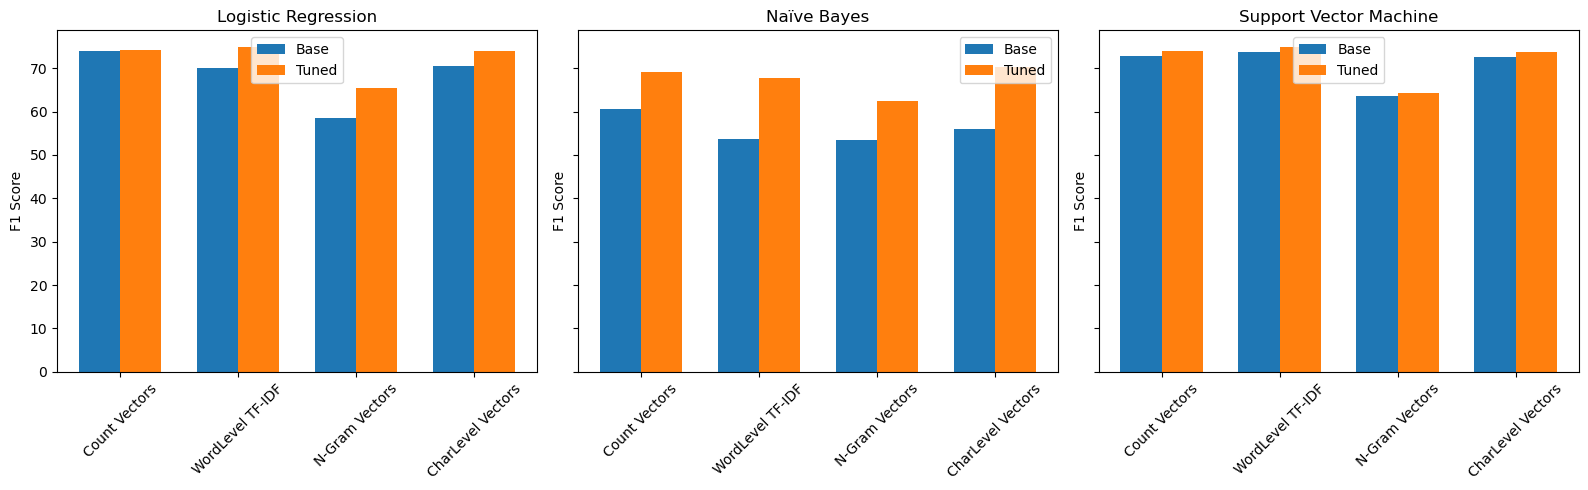

In [93]:
models = results.index.tolist()
vectorizers = results.columns.tolist()

x = np.arange(len(vectorizers))  # [0, 1, 2, 3]
width = 0.35

fig, axs = plt.subplots(1, len(models), figsize=(16, 5), sharey=True)

for i, model in enumerate(models):
    base_values = results.loc[model].values
    tuned_values = results_hyper.loc[model].values

    axs[i].bar(x - width/2, base_values, width, label='Base')
    axs[i].bar(x + width/2, tuned_values, width, label='Tuned')

    axs[i].set_title(model)
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(vectorizers, rotation=45)
    axs[i].set_ylabel('F1 Score')
    axs[i].legend()

plt.tight_layout()
plt.show()


- Logistic Regression:
    - Count Vectors preformed about the same before and after tuning
    - All other vectorisers performed better after tuning
    - Best performing vectoriser is WordLevel TF-IDF after tuning
- Naive Bayes
    - Has performed better over every vectoriser after tuning
    - Improved the most after tuning in comparsion to Logistic Regression and Support Vector Machine
    - Best performing vectoriser is CharLevel Vectors after tuning
- Support Vector Machine
    - Minimal difference from before and after tuning
    - All vectorisers perform around the same except for N-gram vectors.
    - Best performing vectoriser WordLevel TF-IDF
- Overall:
    - Hyperparameter Tuning has improved the results in every model.
        - Most improvements are with Naive Bayes model.
    - N-Gram vectors is still an underperforming vectoriser.
    - The best performing model is Logitistic Regression with WordLevel TF-IDF at 74.98%, while just behind it is the same vectoriser with Support vector machine at 74.96%.

#### 10. Identify Words

In [94]:
# Fit a logistic regression model
model = LogisticRegression(C=1, class_weight='balanced', max_iter=1000, random_state=42, solver='liblinear')
model.fit(X_train_tfidf, y_train)

# Get feature names from the vectorizer
feature_names = tfidf_vect.get_feature_names_out()

# Get the coefficients
coefficients = model.coef_

# For binary classification: positive vs negative
# For multi-class: each row in coef_ corresponds to a class

# Let's say your classes are ordered like ['negative', 'neutral', 'positive']
classes = model.classes_

for i, class_label in enumerate(classes):
    top_positive_indices = coefficients[i].argsort()[-10:]  # top 10
    top_negative_indices = coefficients[i].argsort()[:10]   # bottom 10
    
    print(f"\nClass: {class_label}")
    print("Top Positive Words:")
    print([feature_names[j] for j in top_positive_indices])
    
    print("Top Negative Words:")
    print([feature_names[j] for j in top_negative_indices])



Class: negative
Top Positive Words:
['worse', 'dont', 'hate', 'dead', 'dumb', 'hell', 'ass', 'fuck', 'bad', 'shit']
Top Negative Words:
['best', 'great', 'love', 'pretty', 'good', 'fun', 'super', 'better', 'wish', 'loved']

Class: neutral
Top Positive Words:
['ripped', 'watched', 'product', 'beat', 'started', 'soul', 'simply', 'same', 'crashes', 'childhood']
Top Negative Words:
['good', 'fun', 'best', 'great', 'but', 'like', 'better', 'played', 'and', 'love']

Class: positive
Top Positive Words:
['favorite', 'like', 'played', 'pretty', 'better', 'fun', 'love', 'good', 'great', 'best']
Top Negative Words:
['shit', 'bad', 'fuck', 'ass', 'dead', 'dumb', 'enemies', 'hell', 'boring', 'hate']


In [95]:
import shap
import numpy as np
import matplotlib.pyplot as plt

def explain_review_with_shap(review_index, model, X_test_count, vectorizer, df_reviews, max_words=15):
    # Convert sparse to dense
    X_dense = X_test_count.toarray()

    # Initialize SHAP explainer
    explainer = shap.Explainer(model, X_dense)

    # Get SHAP values for the specific review
    shap_values = explainer(X_dense[review_index:review_index+1])

    # Get feature names
    feature_names = vectorizer.get_feature_names_out()

    # Show original review text
    print(f"\nOriginal review:\n{df_reviews.iloc[review_index]}")

    # Get predicted label
    pred = model.predict(X_dense[review_index:review_index+1])[0]
    print(f"\nPredicted Sentiment: {pred}")

    # Identify correct class index
    class_names = model.classes_
    pred_class_index = np.where(class_names == pred)[0][0] if isinstance(pred, str) else pred

    # Extract SHAP values for predicted class
    shap_vals_for_class = shap_values.values[0][:, pred_class_index]
    review_vector = X_dense[review_index]
    words_contributions = zip(feature_names, shap_vals_for_class, review_vector)

    # Only keep words present in the review
    words_present = [(w, shap_val) for w, shap_val, val in words_contributions if val > 0]

    # Sort by absolute impact
    top_words = sorted(words_present, key=lambda x: abs(x[1]), reverse=True)[:max_words]

    if top_words:
        words, scores = zip(*top_words)
        colors = ['green' if s > 0 else 'red' for s in scores]

        print("\nTop contributing words:")
        for word, score in top_words:
            direction = "↑" if score > 0 else "↓"
            print(f"{word}: {score:.4f} {direction}")

        # Plot
        plt.figure(figsize=(8, 5))
        plt.barh(words, scores, color=colors)
        plt.gca().invert_yaxis()
        plt.title(f"Top Words Influencing Review #{review_index}")
        plt.xlabel("SHAP Value (Impact)")
        plt.tight_layout()
        plt.show()
    else:
        print("No contributing words found for this review.")


Original review:
My personal favorite battlefield game. I absolutely love the multiplayer in this game. The servers are still relatively active, even compared to some of their more recent releases (Battlefield 1, I'm sure Battlefield hardline falls into this same boat). Would highly recommend giving this game's multiplayer a shot if you have not done so already.

Predicted Sentiment: positive

Top contributing words:
love: 0.2619 ↑
favorite: 0.2086 ↑
battlefield: -0.1565 ↓
absolutely: 0.1010 ↑
highly: 0.0912 ↑
game: 0.0751 ↑
recommend: 0.0685 ↑
same: -0.0605 ↓
more: 0.0536 ↑
this: -0.0497 ↓
if: 0.0492 ↑
already: 0.0482 ↑
into: -0.0398 ↓
m: -0.0391 ↓
servers: -0.0377 ↓


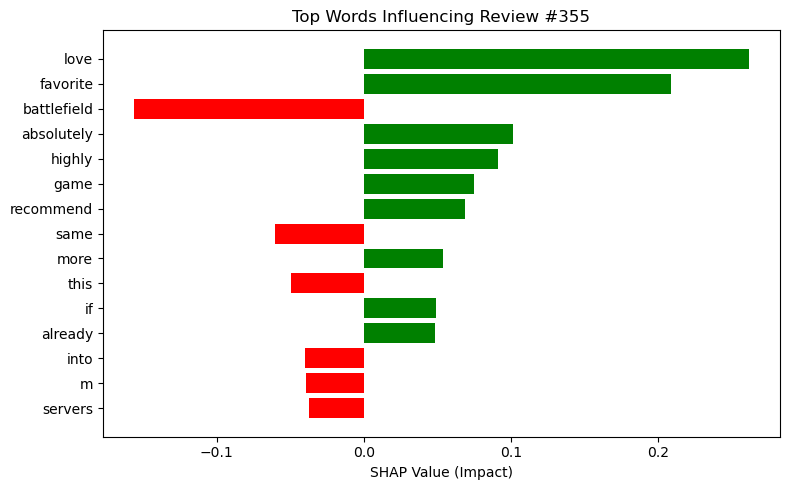

In [97]:
explain_review_with_shap(np.random.randint(0, len(X_test)), model, X_test_tfidf, tfidf_vect, X_test)